<a href="https://colab.research.google.com/github/jhonda18/Python1/blob/main/N4_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Técnicas computacionales en Python para Ciencias Económicas - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> ,  <a href="mailto:sergio.sanes@udea.edu.co"> ✉ Sergio Sanes </a>, <a href="mailto: mario.sucerquia@udea.edu.co"> ✉ Mario Sucerquia </a><br>
Versión actualizada: 3-Ago-2020
</div>

<br>

**El presente curso hace parte de la Facultad de Ciencias Económicas (FCE) de la Universidad de Antioquia.**

El curso será dictado en 16 sesiones o clases de 2 horas los días martes y jueves por medio de Google meeting. Para un total de dedicación temporal de 32 horas. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

# **Gráficos comunes de exploración**

Tanto Numpy como Matplotlib son módulos de Python que nos permiten trabajar problemas sencillos de estadística y exploración de datos. En este notebook trabajaremos con 2 conjuntos de datos reales pero primero aprendamos a descargarlos.



## Histograma

### Variables aleatorias

Una variable aleatoria corresponde a una variable cuyos valores posibles son valores numéricos procedentes de un fenómeno aleatorio. Algunos ejemplos son:

- Presión Arterial.
- Lanzamiento de un dado.
- Precio de una casa en una fecha dada.
- Puntaje obtenido cuando se lanza un dardo a una Diana.

Dentro de los tipos de variables aleatorias tenemos dos grandes grupos, a saber, las variables aleatorias discretas y las variables aleatorias continuas.

#### Variables aleatorias discretas:

Una variable aleatoria discreta corresponde a aquella cuyo valor puede variar dentro de un conjunto finito y contable de valores. En el caso de un dado, por ejemplo, podemos definir una variable aleatoria $X$ de tal forma que dicha puede obtener cualquiera de los valores $[1,2,3,4,5,6]$. Además, cada valor obtenido esta caracterizado por un proceso aleatorio.

La **distribución de probabilidades** de una variable aleatoria discreta es una lista de probabilidades asociadas a cada uno de los valores discretos de dicha variable. A la distribución de probabilidades también se le conoce con el nombre de **función de probabilidad** o **función de masa de probabilidad**. Matematicamente, supongamos que una variable aleatoria discreta $X$ pueda tener $k$ valores diferentes. Entonces, la probabilidad de que $X=x_i$ se define como $P(X=x_i)=p_i$. Las probabilidades $p_i$ deben satisfacer las siguientes condiciones:

1. $0<p_i<1$ $\forall$ $i=1, 2, \cdots,k$.
2. $\sum_{i=0}^k p_i=1\rightarrow p_1 + p_2 + \cdots + p_k=1$.

Algunos ejemplos de distribuciones de probabilidades discretas son:

- La distribución de Bernoulli. 
- La distribución Binomial.
- La distribución de Poisson.





#### Variables aleatorias continuas:

Una **variable aleatoria continua** es aquella que puede tomar un valor dentro de un conjunto infinito (y no discreto) de valores. Por ejemplo, una variable aleatoria continua $X$ podría estar definida como la altura de una persona. El conjunto de valores de una variable continua aleatoria será representado matemáticamente como un intervalo. 

La distribución de probabilidad de una variable aleatoria continua, conocida como **función/funciones de distribución de probabilidad**, son funciones que toman valores continuos. La probabilidad de observar cualquier valor individual es igual 0 ya que el número de valores que puede asumir la variable aleatoria es infinito. Por ejemplo, una variable aleatoria $X$ puede tomar todos los valores en un intervalo de números reales. Entonces, la probabilidad de que X esté en el conjunto de resultados $A$, $P(A)$, se define como el área por encima de $A$ y debajo curva o función de distribución. 

![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/c_var_prob.png?raw=true)

La curva, que representa una función $p(x)$, debe satisfacer las siguientes condiciones:

1. La curva no puede tener valore negativos, es decir, $p(x)>0$ $\forall$ $x$.
2. El área total bajo la curva es igual a uno.

A una curva que cumple con estas condiciones se le conoce como curva de densidad, o **densidad de probabilidades**. Algunos ejemplos de distribuciones de probabilidades continuas son:

- Distribución normal.
- Distribución Exponencial. 
- Distribución Beta.

#### Función de distribución acumulativa (CDF - Cumulative distribution function)

En teoría de probabilidades y estadística, la función de distribución cumulativa de una variable real aleatoria $X$, evaluada en $x$, es la probabilidad de que $X$ tome valores iguales o menores que $x$. Matemáticamente se denota como

\begin{equation}
  F_X(x)=P(X\leq x)
\end{equation}

Resulta fácil ver que la probabilidad $F_X(x)$ resulta de una suma o integral acumulada sobre los valores de probabilidad dados por la distribución. 

### La distribución normal

\begin{equation}
  f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}
\end{equation}

In [ ]:
#Cambiemos el estilo para que sea vea más chulo
plt.style.use('seaborn-darkgrid')
#Si quieres saber que más estilos hay puedes usar:
#plt.style.available

Para hacer un histograma usaremos dos funciones

In [ ]:
import seaborn as sns

def hist_sea(y,bins=20):
  plt.figure(figsize=(15,5))
  ax = plt.subplot(1,1,1)
  ax.set_title('Histograma')
  sns.distplot(y,bins=bins, hist = True, ax=ax)
  ax.set_xlabel('Variable')
  return ax

def hist_mat(y,bins=20):
  plt.figure(figsize=(15,5))
  ax = plt.subplot(1,1,1)
  ax.set_title('Histograma')
  ax.hist(y,bins=20,density=True)
  ax.set_xlabel('Variable')
  return ax

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Generemos un conjunto de datos usando `np.random`

In [ ]:
y = np.random.normal(6,1,1000)
y.min(),y.max()

(2.507447304040671, 9.0687494379907)

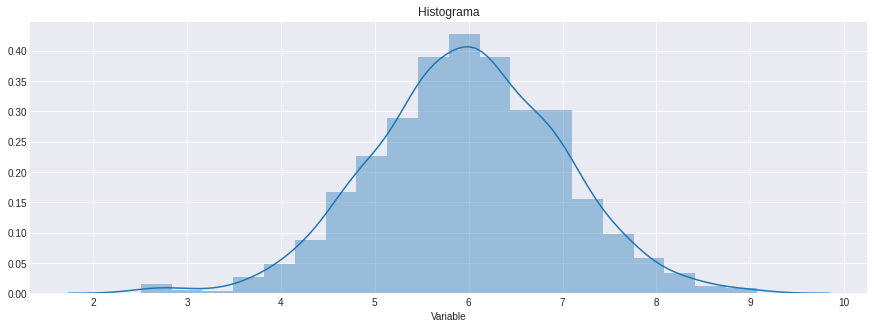

In [ ]:
ax = hist_sea(y)
plt.show() 

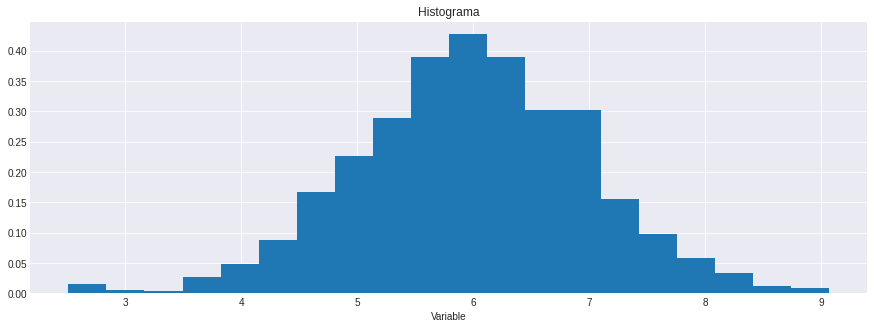

In [ ]:
ax = hist_mat(y)
plt.show() 

Tambien podemos usar funciones de [`scipy`](https://scipy.github.io/devdocs/tutorial/stats.html)

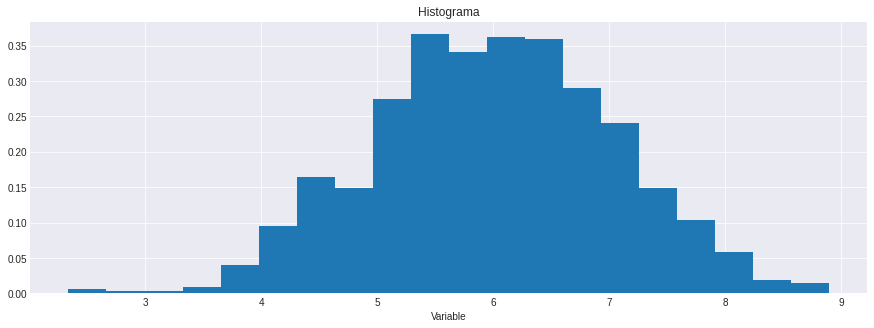

In [ ]:
from scipy import stats
y_scipy = stats.norm.rvs(size=1000,loc=6,scale=1)
ax = hist_mat(y_scipy)
plt.show()

### Calculado la pdf

Para calcular la PDF según la distribución más adecuada podemos seguir los siguientes pasos:

In [ ]:
y = np.random.normal(6,1,500) #Vamos a crear una distribución con una media en 6 y std 1

In [ ]:
print("Media:",y.mean())
print("Desviación:",y.std())
print("Varianza:",y.var())
print("Mediana:",np.median(y))
print("Moda:",stats.mode(y))
print("Correlación:",np.corrcoef(y))
print("Covarianza:",np.cov(y))

Media: 5.970596827232105
Desviación: 1.0099117902134231
Varianza: 1.019921824012081
Mediana: 5.920385444530045
Moda: ModeResult(mode=array([3.02035725]), count=array([1]))
Correlación: 1.0
Covarianza: 1.0219657555231272


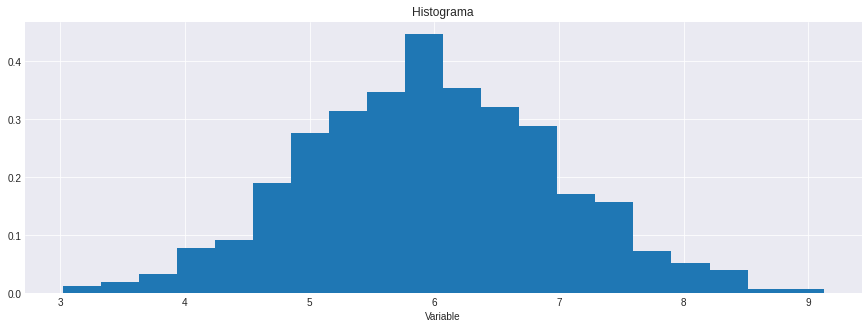

In [ ]:
ax = hist_mat(y)
plt.show()

Se puede verificar graficamente que los datos siguen una distribución normal, pero podemos hacer un [test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html):

In [ ]:
stats.normaltest(y)

NormaltestResult(statistic=0.16812753703960842, pvalue=0.9193726271942207)

Esta prueba tiene como hipotesis:

* Hipotesis nula: Los datos vienen de una distribución normal
* Hipotesis alternativa: Los datos viene de otro tipo de dsitribución. 

Es decir que para recharzar la hipotesis nula necesitamos valores de p pequeños. Definamos $\alpha=0.01$

Según esto con un p-values mayor que 0.01 no podemos recharzar la hipotesis nula. Probemos con otras distribuciones:

In [ ]:
stats.normaltest(np.random.exponential(size=100))

NormaltestResult(statistic=21.271703912421927, pvalue=2.4038545433761564e-05)

In [ ]:
stats.normaltest(np.random.uniform(size=100))

NormaltestResult(statistic=19.116690112316455, pvalue=7.060955687264529e-05)

Con esto podemos asegurarnos que un grupo de datos siga este tipo de distribución, ahora vamos a calcular su "forma":

In [ ]:
rv = stats.norm(y.mean(),y.std())

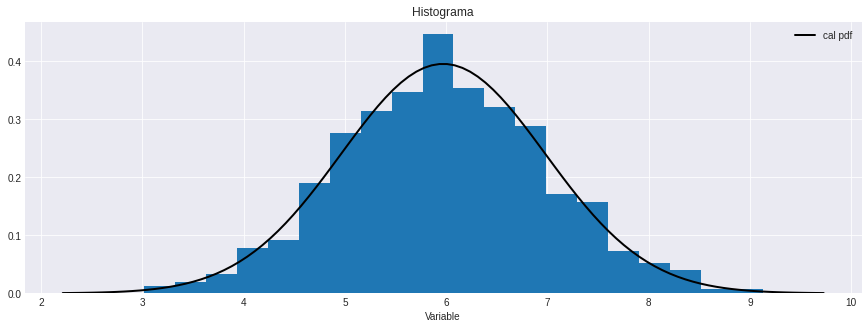

In [ ]:
y_pdf = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
ax = hist_mat(y)
ax.plot(y_pdf, rv.pdf(y_pdf), 'k-', lw=2, label='cal pdf')
ax.legend()
plt.show()

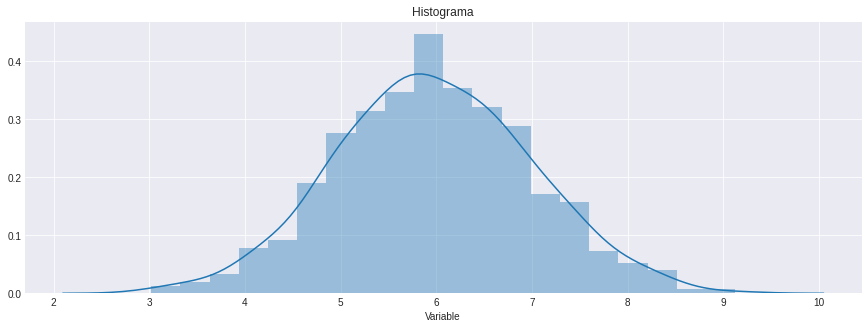

In [ ]:
ax = hist_sea(y)

### Distribución Poisson 

Un variable aleatoria de Poisson se usa generalmente para modelar la cantidad de veces que ocurre un evento en un intervalo de tiempo. Por ejemplo, el número de usuarios que visita un sitio web en un intervalo dado representa un proceso de Poisson. La distribución de Poisson se describe en términos de la tasa ($\mu$) a la que ocurren los eventos. Un evento puede ocurrir $0, 1, 2,\cdots$ veces en un intervalo de tiempo. El número promedio de eventos en un tiempo $t$ se designa como $\lambda$. Lambda es la tasa de eventos, y es llamada parámetro de tasa. La probabilidad de observar $k$ eventos en un intervalo viene dada por la ecuación:

\begin{equation}
  P(k \text{ eventos en }\delta t)=\frac{e^{-\lambda}\lambda^k}{k!}
\end{equation}


In [ ]:
y_poisson = np.random.poisson(lam=3.0, size=500) 

Una parte de importante de la distribución de poisson es que su media y variancia son iguales (o muy cercanas)

In [ ]:
print("Media:",y_poisson.mean())
print("Desviación:",y_poisson.std())
print("Varianza:",y_poisson.var())

Media: 2.996
Desviación: 1.6673284019652514
Varianza: 2.7799839999999993


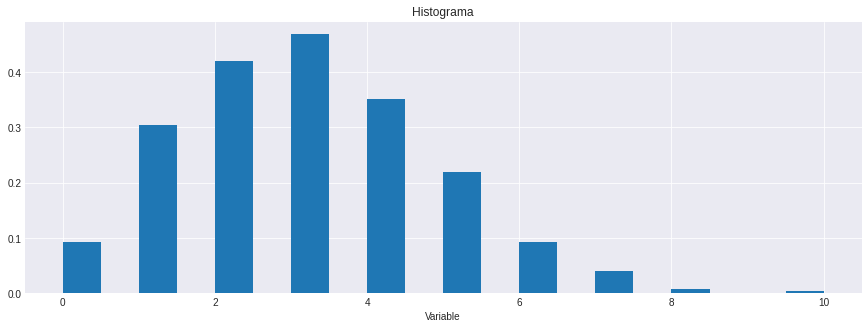

In [ ]:
ax = hist_mat(y_poisson)

In [ ]:
#stats.kstest(y_poisson,'poisson',(y_poisson.mean(),))

In [ ]:
rv = stats.poisson(y_poisson.mean())

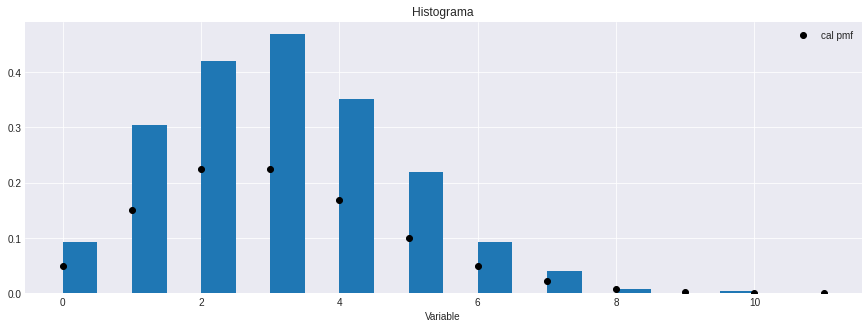

In [ ]:
y_pmf = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
ax = hist_mat(y_poisson)
#Recuerda que esta distribución es discreta:
pmf = rv.pmf(y_pmf)
ax.plot(y_pmf[pmf!=0], pmf[pmf!=0], 'ko ', lw=2, label='cal pmf')
ax.legend()
plt.show()

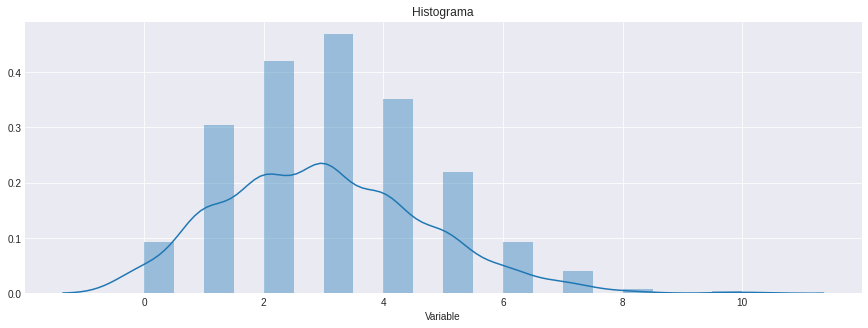

In [ ]:
ax = hist_sea(y_poisson)
plt.show()

In [ ]:
pmf = ax.lines[0].get_xydata()

## Caja y Bigotes
![fig](https://lh3.googleusercontent.com/proxy/zZl6ajlr8OwvvCQniJuqEQWVdJjCoqIwc8d-z9L6kiVDtBXQ8QVXxn-ex7vTEaiW3bdeHwc4DSZV4UpgFCLhfzUqKNn3Y486Gg0GcBmEfEU2tcynIBZDQ67W9QLrk9vc9g1bi-W7Oys4lrLzdYHqrt284ng)

In [ ]:
N = 200

r = [np.abs(np.random.normal(5,2,N)),
     np.abs(np.random.exponential(1,N)),
     np.abs(np.random.gamma(1,2,N)),
     np.abs(10*np.random.beta(5,1,N))]

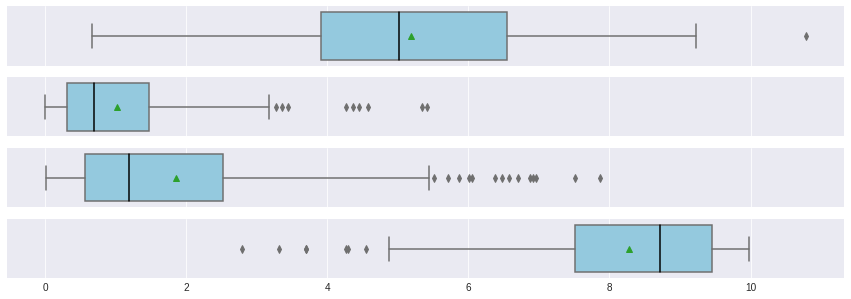

In [ ]:
#fig y un axes (subplots de varias filas compartiendo la misma x)
fig, ax = plt.subplots(4, sharex=True, figsize=(15,5))
for i in range(4):
  sns.boxplot(r[i], ax=ax[i],color='skyblue',medianprops={'color':'black'},showmeans=True)

[Seaborn](https://seaborn.pydata.org/)

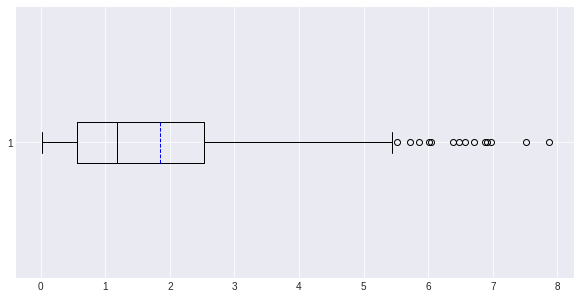

In [ ]:
#sns.boxplot()
plt.figure(figsize=(10,5))
plt.boxplot(r[2],meanline=True,medianprops={'color':'black'},vert=False,meanprops={"color":"blue"},showmeans=True)
plt.show()

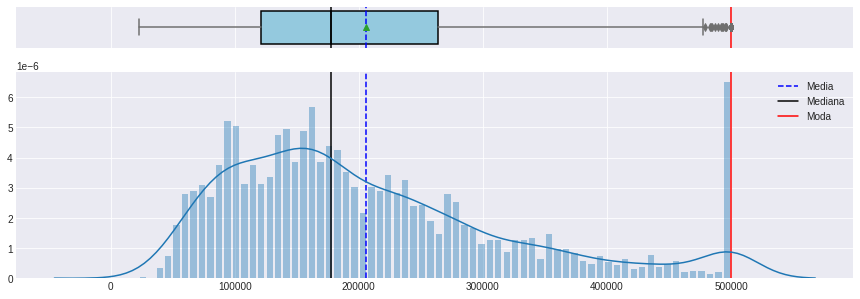

In [ ]:
data = pd.read_csv('sample_data/california_housing_test.csv')
def central_measures(data):
  #data ---> arreglo de numpy
  #shape #filas, #columnas #share #gridspec_kw --> cambiar relaciones de ancho y alto
  f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)},figsize=(15,5))

  #Crear las líneas verticales
  [axi.axvline(data.mean(),color='b',ls='--',label='Media') for axi in ax]
  [axi.axvline(np.median(data),color='k',label='Mediana') for axi in ax]
  [axi.axvline(stats.mode(data).mode[0],color='r',label='Moda') for axi in ax]
  
  #Para hacer la caja y bigotes
  sns.boxplot(data, ax=ax[0],color='skyblue',medianprops={'color':'black'},showmeans=True)
  
  #Para quitar los bordes
  [a.set_edgecolor('black')for a in ax[0].artists]
  ax[0].set(xlabel='')

  #Grafico el histograma con la pdf
  sns.distplot(data,bins=70, hist_kws={"rwidth":0.75},hist = True,ax=ax[1])
  ax[1].legend()
  plt.show()

columna = 'median_house_value' #@param ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
central_measures(data[columna].values)


# **SciPy** 

Es una [biblioteca](https://www.scipy.org/) libre y de código abierto para Python. Se compone de herramientas y algoritmos matemáticos

SciPy se basa en el objeto de matriz NumPy y es parte del conjunto NumPy, que incluye herramientas como Matplotlib, pandas y SymPy, y un conjunto en expansión de bibliotecas de computación científica. Este conjunto está dirigido al mismo tipo de usuarios que los de aplicaciones como MATLAB, GNU Octave, y Scilab. A veces también se hace referencia a este conjunto de herramientas y bibliotecas como SciPy.

[Restriciones en optimización](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

## Integración Numérica

In [ ]:
from scipy import integrate

Vamos integrar la función:

$$ f(x) = e^{-x^2}$$

Para ello debemos definir la función con la sentencia **def**


In [ ]:
def f(x):
  return np.exp(-x**2)

In [ ]:
integrate.quad(f,0,5)

(0.8862269254513955, 2.3183115159980698e-14)

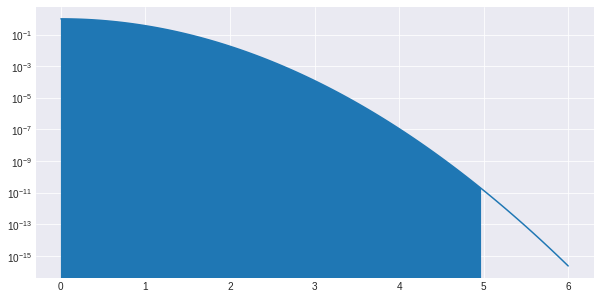

In [ ]:
x = np.linspace(0,6,100)
plt.figure(figsize=(10,5))
plt.plot(x,f(x))
plt.yscale('log')
plt.fill_between(x[x<=5],f(x[x<=5]))
plt.show()

Sin embargo es posible que las funciones tengan argumentos , por ejemplo:

$$ f(x) = A e^{-Bx^2}$$



In [ ]:
#Si queremos pasarle argumentos como A y B debe 
#hacerse usando la opcion args
def f(x,A,B):
  return A*np.exp(-B*x**2)

In [ ]:
integrate.quad(f,0,5, args=(3,5))

(1.1889981892818033, 3.5936015719151976e-12)

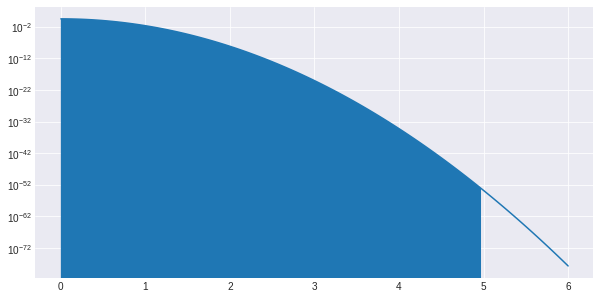

In [ ]:
x = np.linspace(0,6,100)
plt.figure(figsize=(10,5))
plt.plot(x,f(x,3,5))
plt.yscale('log')
plt.fill_between(x[x<=5],f(x[x<=5],3,5))
plt.show()

## Ecuaciones diferenciales ordinarias (EDOs)


### Ecuación de primer orden



Imaginemos que tenemos una función y(t), tal que podamos crear el siguente sistema:

$ \dfrac{dy(t)}{dt}+ y(t) = 0$

$\dfrac{dy}{dt} = f(y)$

In [ ]:
def y_prima(y,t):
  return -y

In [ ]:
y_prima_0 = 1 #t = 0; y'= 1
t = np.linspace(0,4)
sol = integrate.odeint(y_prima,y_prima_0,t)

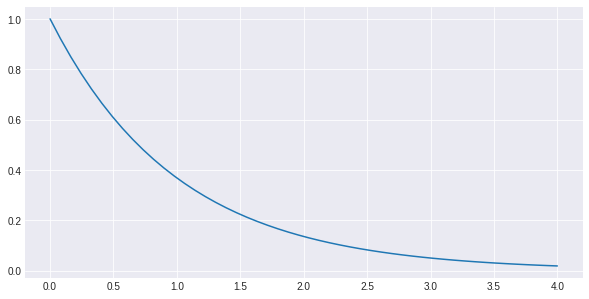

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(t,sol)
plt.show()

### Ecuación de orden superior

La solución de ecuaciones de orden superior requiere linealizar las ecuaciones, por ejemplo 
$$\dfrac{d^2y}{dt} + b^2y=0$$

Es decir, convertir una ecuación de orden dos, en dos de orden uno:

$f(\mathbf{y}) = \dfrac{d(y,y')}{dt} = (\dfrac{dy}{dt},\dfrac{d^2y}{dt^2})=(y',-y)$

O $\begin{cases}
y'(t) = y_p(t) \\
y_p'(t) = -by(t)
\end{cases}
$

Cuya solución es $y = Acos(bt + \phi)$


In [ ]:
def y_prima2(t,y,b): #y vector de incógnitas y[1] -> y y en y[0] -> yp' 
  return np.array([-b**2*y[1],y[0]]) 

In [ ]:
y_prima2_0 = np.array([0.0,1.0]) #y0[0] y(t=0)-->1.0 // y'(t=0) --> 0.0
t = np.linspace(0,10,101)
b=2
sol=integrate.odeint(y_prima2,y_prima2_0,t, args=(b,), tfirst=True)

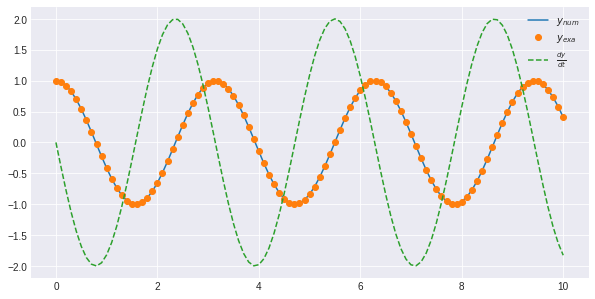

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(t,sol[:,1],label=r'$y_{num}$')
plt.plot(t,np.cos(b*t),"o ",label=r'$y_{exa}$')
plt.plot(t,sol[:,0],'--',label = r"$\frac{dy}{dt}$")
plt.legend()
plt.show()

In [ ]:
sol_1 = integrate.solve_ivp(y_prima2, (0,10), y_prima2_0, method='RK23', t_eval=t,  args=(b,))

In [ ]:
sol_1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 314
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])
 t_events: None
        y: array([[ 0.        , -0.39733569, -0.77878797, -1.12903887, -1.43412986,
        -1.68184105, -1.86235746, -1.9687580

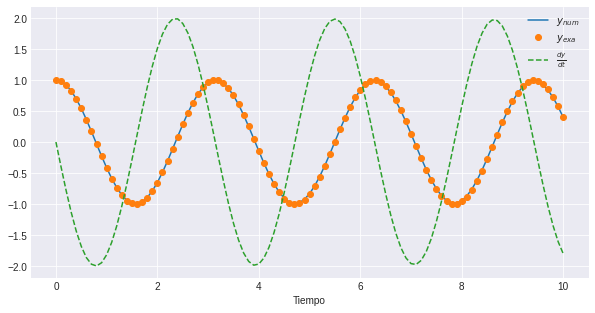

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(t, sol_1.y[1], label=r'$y_{num}$')
plt.plot(t,np.cos(b*t),"o ",label=r'$y_{exa}$')
plt.plot(t, sol_1.y[0], '--', label = r"$\frac{dy}{dt}$")
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.show()

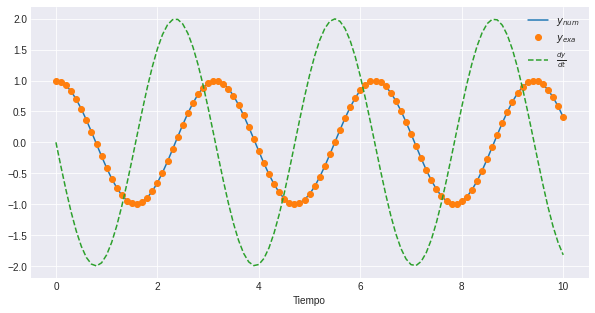

In [ ]:
sol_2 = integrate.solve_ivp(y_prima2, (0,10), y_prima2_0, method='DOP853', t_eval=t,  args=(b,))
plt.figure(figsize=(10,5))
plt.plot(t, sol_2.y[1], label=r'$y_{num}$')
plt.plot(t,np.cos(b*t),"o",label=r'$y_{exa}$')
plt.plot(t, sol_2.y[0], '--', label = r"$\frac{dy}{dt}$")
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.show()

## Ecuaciones algebraicas no lineales



$M = E-e\sin E$

Resolverla equivale a encontrar los ceros de la siguiente ecuacion:

$F(E) = E- e* \sin E - M$

In [ ]:
from scipy import optimize

In [ ]:
def F_ex(E,e,M):
  return E - e*np.sin(E) - M

In [ ]:
sol=optimize.root(F_ex,-0.1,args=(0.016,0.1))

In [ ]:
sol

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([-6.00093683e-10])
       r: array([-0.98408254])
  status: 1
 success: True
       x: array([0.10162317])

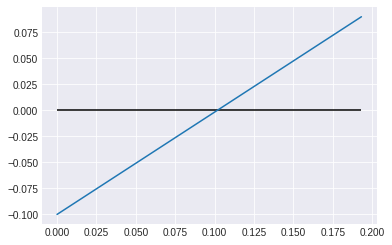

In [ ]:
E = np.linspace(0,sol.x*1.9,100)
plt.plot(E,F_ex(E,0.016,0.1))
plt.hlines(0,E.min(),E.max())
plt.show()

## Minimización y maximización

$$G(x) = b$$
$$F(x) = G(x) - b$$

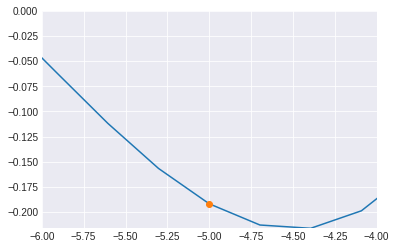

In [ ]:
x = np.linspace(-15,15,100)
y = -1*rsinc(x)
plt.plot(x,y)
plt.plot(-5,y[x==-5],marker="o")
plt.ylim(y.min(),0)
plt.xlim(-6,-4)
plt.show()

Optimization terminated successfully.
         Current function value: -0.128375
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 19
         Function evaluations: 38


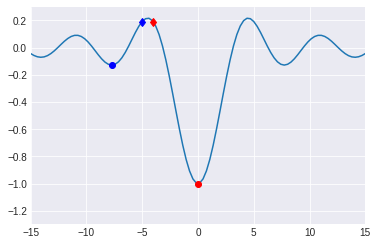

In [ ]:
from scipy.optimize import fmin
 
# Función objetivo
rsinc = lambda x: -1 * np.sin(x)/x
 
# Empezamos a partir de x = -5
x0 = -5
xmin0 = fmin(rsinc,x0)
 
# Empezamos a partir de x = -4
x1 = -4
xmin1 = fmin(rsinc,x1)
 

x = np.linspace(-15,15,100)
y = rsinc(x)
plt.plot(x,y)
plt.plot(x0,rsinc(x0),'bd',xmin0,rsinc(xmin0),'bo')
plt.plot(x1,rsinc(x1),'rd',xmin1,rsinc(xmin1),'ro')
plt.axis([-15,15,-1.3,0.3])
plt.show()

## Interpolación y ajustes

In [ ]:
from scipy.interpolate import barycentric_interpolate

In [ ]:
#Función de Rung
def runge(x):
  return 1/(1+x**2)

In [ ]:
N = 11 #nodos de interpolación
xp = np.arange(11) - 5
fp = runge(xp)

x=np.linspace(-5,5,1000)
y=barycentric_interpolate(xp,fp,x)
#Esta interpolación ofrece resultados muy pobres

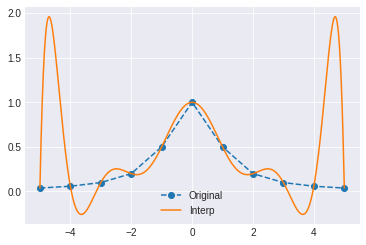

In [ ]:
plt.plot(xp,fp,"o--",label="Original")
plt.plot(x,y,'-',label="Interp")
plt.legend()
plt.show()

In [ ]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [ ]:
#generemospuntos aleatorios:
xi=np.random.randint(10,size=20)
xi=np.sort(np.unique(xi))
yi=np.random.randint(10,size=len(xi))

x=np.linspace(min(xi),max(xi),1001)

y1   = np.interp(x,xi,yi) #interpolación 1D
y2 = barycentric_interpolate(xi,yi,x)
yspl = InterpolatedUnivariateSpline(xi,yi,k=3)(x)

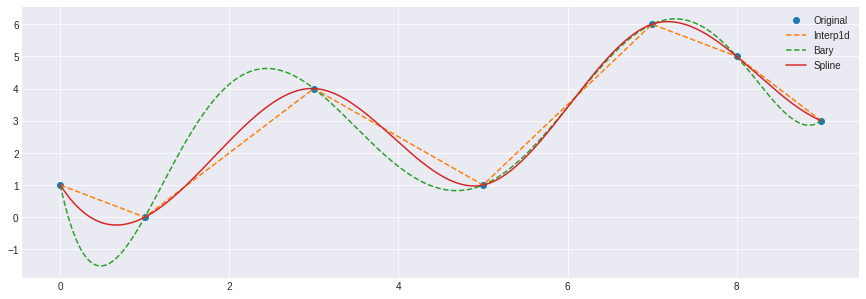

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(xi,yi,"o",label="Original")
plt.plot(x,y1,"--",label="Interp1d")
plt.plot(x,y2,"--",label="Bary")
plt.plot(x,yspl,"-",label="Spline")
plt.legend()
plt.show()